<a href="https://colab.research.google.com/github/Mac98M/MachineLearning2024_DrAliyari_KNTUCourse/blob/main/HomeWorks/HW1/Code/masihmokhtari_ml_miniproj1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Masih Mokhtari**

**Machine Learning Course Dr.Aliyari**

**miniproj1**

$Q1$



Before we start we have to import libraries we need.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import joblib
import os
#import mlxtend

from sklearn.datasets import make_classification , make_blobs , make_circles
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

from mlxtend.plotting import plot_decision_regions

from drawdata import ScatterWidget

from imblearn.over_sampling import SMOTE

In [ ]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 165.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

## 1-2 Generating dataset and vizualizing

### 1-2-1 Generating dataset and effect of its parameters on difficulty of classification

(1000, 3) (1000,)


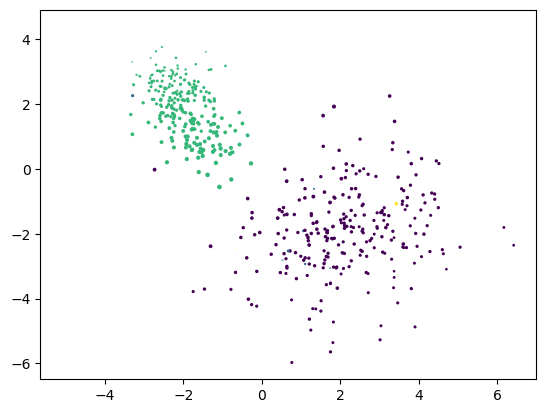

In [ ]:
X , y = make_classification(n_samples=1000, n_features=3, n_classes = 4,
                            n_informative = 3, n_redundant=0, n_repeated = 0,
                            n_clusters_per_class = 1, class_sep = 2, random_state=54)

"""""X , y = make_classification(n_samples=1000, n_features=6, n_classes = 4,
                            n_informative = 4, n_redundant=2, n_repeated = 0,
                            n_clusters_per_class = 1, class_sep = 2, random_state=54)"""""

print(X.shape , y.shape)
plt.scatter(X[:,0] , X[:,1] , X[:,2] , c=y)

But this plot is not really clear. We can plot our dataset in 2D or in 3D form. If we want to plot dataset in 2D, we have to plot features 2 by 2. As we have 3 features, we have Cn(2,3)=3 optins.

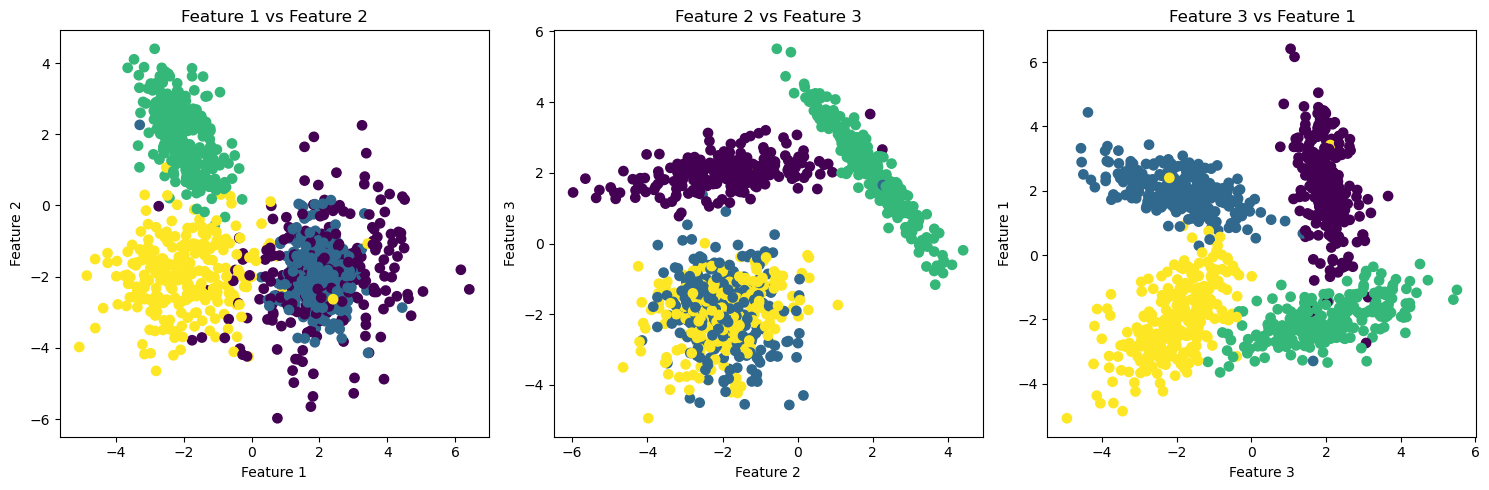

In [ ]:
# Create 2D scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
j = 0
for i in range(3):
    if i == 2 :
        j = 0
    else :
        j = i + 1
    plt.subplot(1,3,i+1)
    plt.scatter(X[:, i], X[:, j], c=y, s=45)  # Adjust size and colormap
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel(f'Feature {j+1}')
    plt.title(f'Feature {i+1} vs Feature {j+1}')

plt.tight_layout()
plt.show()

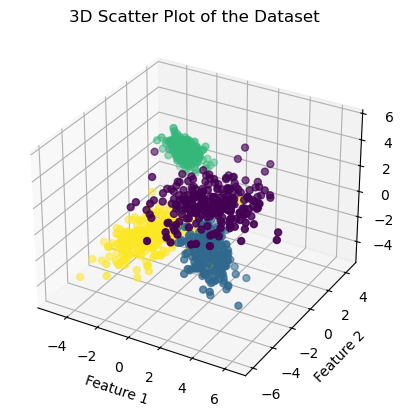

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=25)  # Adjust size and colormap
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot of the Dataset')
plt.show()

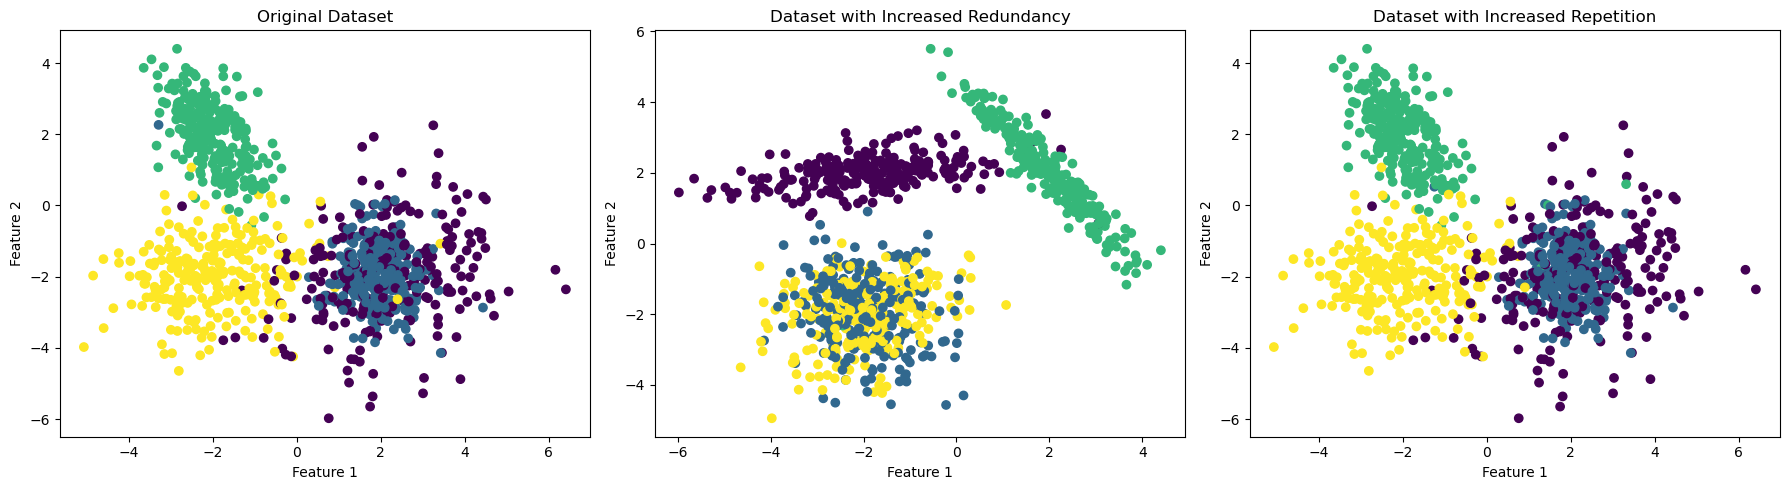

In [ ]:
# Generate the original dataset
X, y = make_classification(n_samples=1000, n_features=3, n_classes=4,
                           n_informative=3, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=2, random_state=54)

# Generate datasets with increased redundancy and repetition
X_redundant, y_redundant = make_classification(n_samples=1000, n_features=5, n_classes=4,
                                                n_informative=3, n_redundant=2, n_repeated=0,
                                                n_clusters_per_class=1, class_sep=2, random_state=54)

X_repeated, y_repeated = make_classification(n_samples=1000, n_features=5, n_classes=4,
                                              n_informative=3, n_redundant=0, n_repeated=2,
                                              n_clusters_per_class=1, class_sep=2, random_state=54)

# Plot original dataset
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot dataset with increased redundancy
axs[1].scatter(X_redundant[:, 0], X_redundant[:, 1], c=y_redundant, cmap='viridis')
axs[1].set_title('Dataset with Increased Redundancy')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Plot dataset with increased repetition
axs[2].scatter(X_repeated[:, 0], X_repeated[:, 1], c=y_repeated, cmap='viridis')
axs[2].set_title('Dataset with Increased Repetition')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

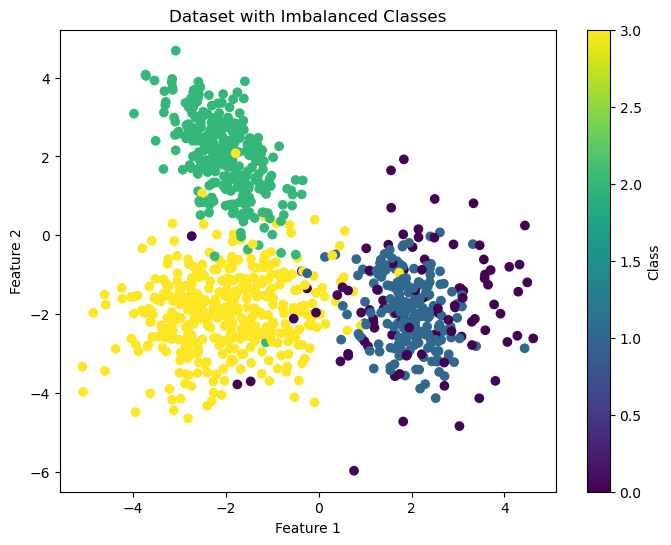

In [ ]:
# Generate the original dataset with imbalanced classes
X_imbalanced, y_imbalanced = make_classification(n_samples=1000, n_features=3, n_classes=4,
                                                  n_informative=3, n_redundant=0, n_repeated=0,
                                                  n_clusters_per_class=1, class_sep=2,
                                                  weights=[0.1, 0.2, 0.3, 0.4], random_state=54)

# Plot dataset with imbalanced classes
plt.figure(figsize=(8, 6))
plt.scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=y_imbalanced, cmap='viridis')
plt.title('Dataset with Imbalanced Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

### 1-2-2 Adding noise to dataset

Now Add noise to dataset and see how distribiution is changing.

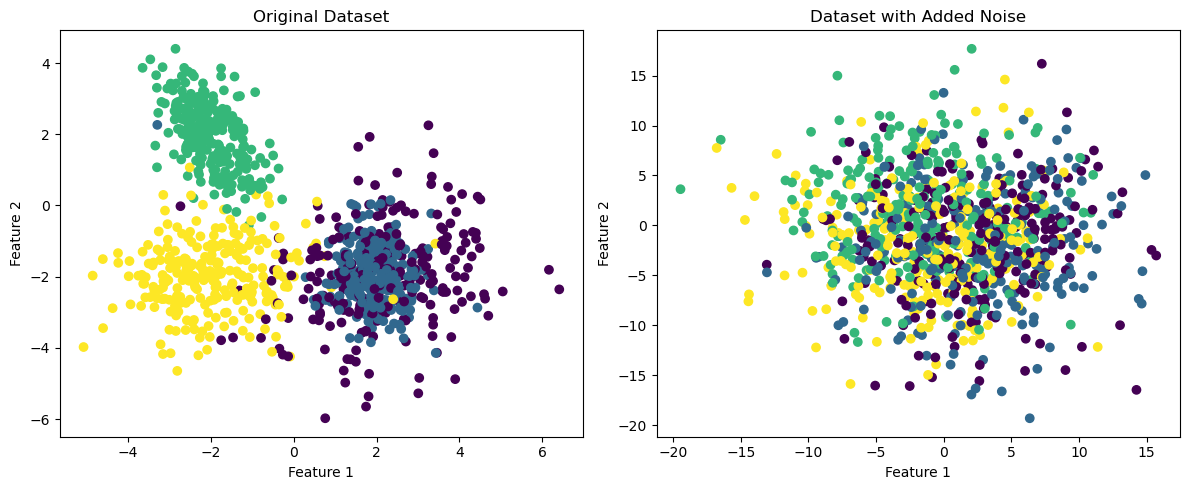

In [ ]:
# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=3, n_classes=4,
                           n_informative=3, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=2, random_state=54)

# Define the variance of white noise
noise_variance = 5  # You can adjust this value as needed

# Generate white noise
noise = np.random.normal(loc=0, scale=noise_variance, size=X.shape)

# Add noise to the dataset
X_with_noise = X + noise

# Plot the original dataset
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the dataset with added noise
axs[1].scatter(X_with_noise[:, 0], X_with_noise[:, 1], c=y, cmap='viridis')
axs[1].set_title('Dataset with Added Noise')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

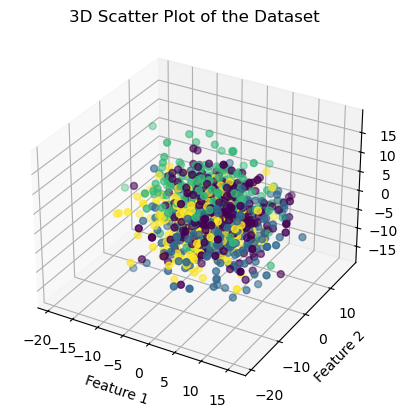

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_with_noise[:, 0], X_with_noise[:, 1], X_with_noise[:, 2], c=y, s=25)  # Adjust size and colormap
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot of the Dataset')
plt.show()

## 1-3 Implement model for classification for generated model

At first we split generated dataset to train and test part. We determine the test size 10% because our dataset is not very large and for better learning we better use more data. In this miniproj we use random_state = 54. We try to implement 3 models for this classification task:{Logistic Regression , SGD , Perceptron}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .3 , random_state = 54)
print(f"x_train shape : {x_train.shape} and x_test shape : {x_test.shape} and y_train shape : {y_train.shape}")

x_train shape : (700, 3) and x_test shape : (300, 3) and y_train shape : (700,)


### 1-3-1 Logistic Regression model

In [ ]:
lgr_model = LogisticRegression(solver = "sag" , max_iter = 20 , random_state = 54)
lgr_model.fit(x_train , y_train)
y_hat = lgr_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = lgr_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = lgr_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgr_model.predict_proba(x_test)

predict : [0 2 3 3 1 1 3 0 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 1 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 0 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 2 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 3 3 2 1 0 1
 3 2 3 0 3 1 0 1 2 1 3 1 1 2 2 1 1 3 1 2 0 3 3 0 2 2 0 2 0 3 2 0 2 0 2 2 3
 0 1 3 3 0 0 2 0 2 3 1 1 2 3 2 1 1 0 3 1 1 3 2 1 2 2 3 2 3 3 0 1 3 0 0 3 3
 1 2 3 2 0 0 1 0 2 2 0 0 0 2 1 1 1 3 2 0 1 3 0 2 2 1 2 2 0 2 2 3 2 2 0 2 0
 0 3 2 1] 
real :    [0 2 3 3 1 1 3 0 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 3 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 1 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 2 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 0 3 2 

array([[9.55503404e-01, 4.40731047e-02, 1.62201323e-04, 2.61290292e-04],
       [1.37533806e-04, 1.21909920e-05, 9.98021218e-01, 1.82905738e-03],
       [7.81317083e-06, 1.02390425e-02, 1.92696012e-05, 9.89733875e-01],
       ...,
       [7.38234795e-11, 1.27913324e-04, 3.05655921e-08, 9.99872056e-01],
       [1.83363625e-03, 1.20439648e-06, 9.98073904e-01, 9.12551215e-05],
       [4.16225456e-03, 9.08597162e-01, 4.20022138e-06, 8.72363832e-02]])

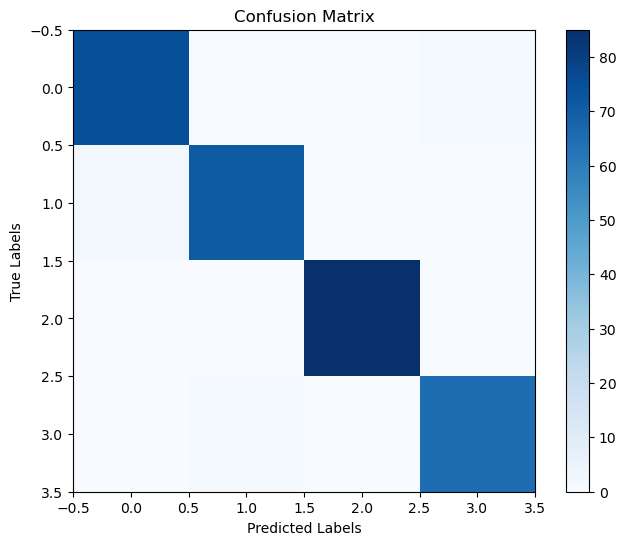

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best accuracy :0.9866666666666667 , optimal epoch : 6
[0.9766666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667]


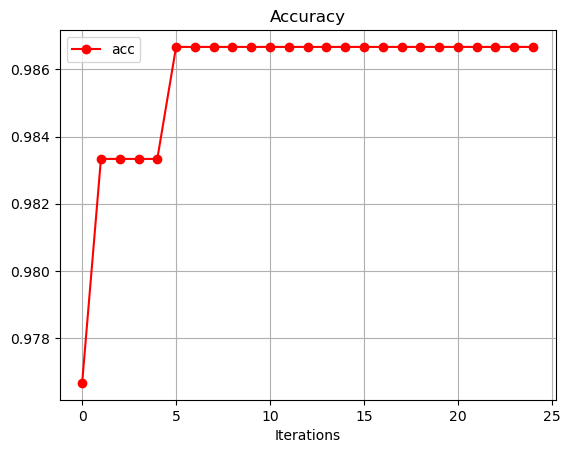

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    lgr_model = LogisticRegression(solver = "sag" , max_iter = i , random_state = 54)
    lgr_model.fit(x_train , y_train)
    acc = lgr_model.score(x_test , y_test)
    acc_history.append( acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

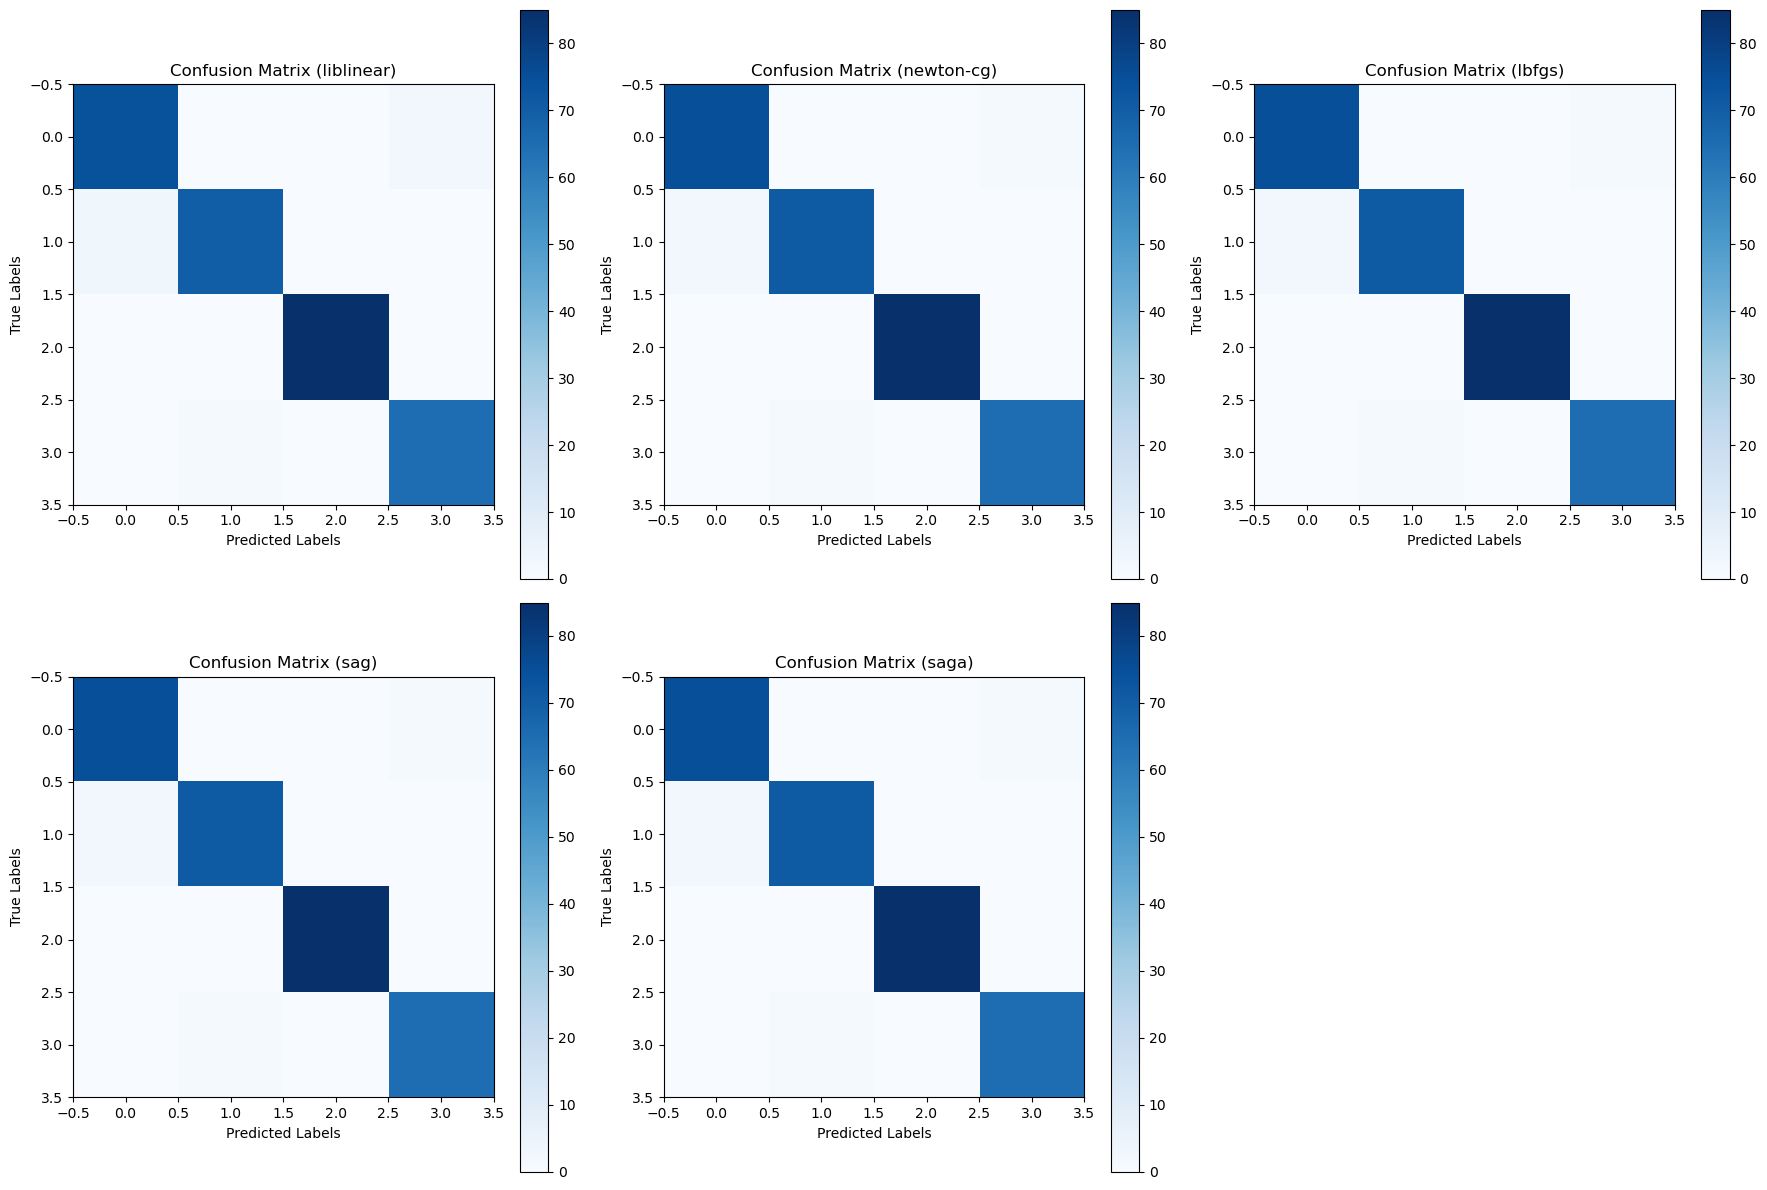

Classification Report (liblinear):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.99      0.96      0.97        73
           2       1.00      1.00      1.00        85
           3       0.97      0.98      0.98        66

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Classification Report (newton-cg):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.99      0.97      0.98        73
           2       1.00      1.00      1.00        85
           3       0.98      0.98      0.98        66

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Classification Report (lbfgs):
              precision    

In [ ]:
# List of solvers to compare
solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
acc_list=[]
itr = 0
# Dictionaries to store metrics
conf_matrices = {}
class_reports = {}
roc_curves = {}
pr_curves = {}

# Train and evaluate models for each solver
for solver in solvers:
    # Train the logistic regression model
    lgr_model = LogisticRegression(solver=solver, max_iter=20, random_state=54)
    lgr_model.fit(x_train, y_train)

    # Predictions
    y_pred = lgr_model.predict(x_test)
    y_prob = lgr_model.predict_proba(x_test)

    # Confusion matrix
    conf_matrices[solver] = confusion_matrix(y_test, y_pred)

    # Classification report
    class_reports[solver] = classification_report(y_test, y_pred)

    acc_list.append(lgr_model.score(x_test , y_test))
    itr +=1


# Plot Confusion Matrices
plt.figure(figsize=(18, 12))
for i, solver in enumerate(solvers, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(conf_matrices[solver], cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({solver})')
    plt.colorbar()
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Print Classification Reports
for solver in solvers:
    print(f"Classification Report ({solver}):")
    print(class_reports[solver])
    print()
itrr = 0
for solver in solvers:
    print(f"{solver} precision : \n{acc_list[itrr]}")
    itrr +=1

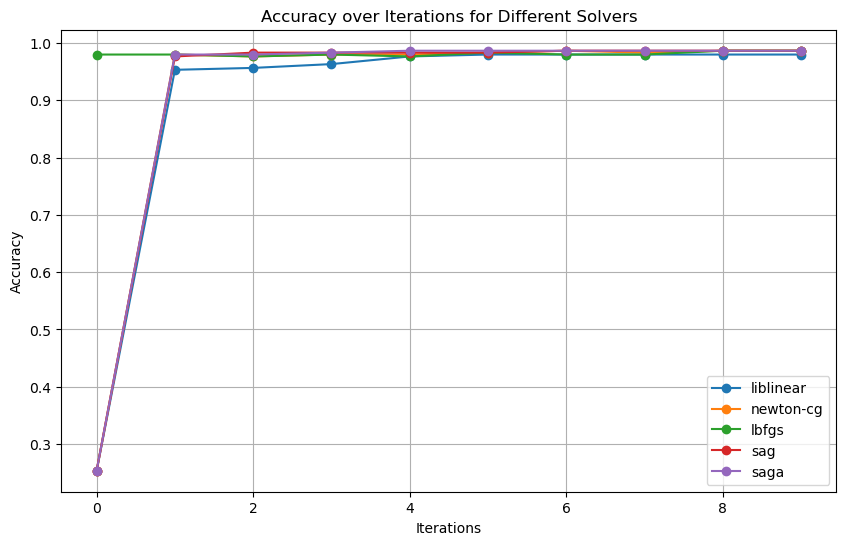

In [ ]:
# Epoch
Epoch = 10

# Solvers to compare
solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
#solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]

# Dictionary to store accuracy history for each solver
acc_histories = {solver: [] for solver in solvers}

# Train models for each solver and record accuracy history
for solver in solvers:
    best_acc = 0
    for i in range(Epoch):
        lgr_model = LogisticRegression(solver=solver, max_iter=i, random_state=54)
        lgr_model.fit(x_train, y_train)
        acc = lgr_model.score(x_test, y_test)
        acc_histories[solver].append(acc)
        if acc > best_acc:
            best_acc = acc

# Plot accuracy history for each solver
plt.figure(figsize=(10, 6))
for solver in solvers:
    plt.plot(range(Epoch), acc_histories[solver], marker='o' ,label=solver)

plt.title('Accuracy over Iterations for Different Solvers')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### 1-3-2 SGD model

In [ ]:
SGD_model = SGDClassifier(loss = "log_loss" , random_state = 54)
SGD_model.fit(x_train , y_train)
SGD_model.score(x_test , y_test)

0.9733333333333334

In [ ]:
SGD_model = SGDClassifier(loss = "log_loss" , random_state = 54)
SGD_model.fit(x_train , y_train)
y_hat = SGD_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = SGD_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = SGD_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgr_model.predict_proba(x_test)

predict : [0 2 3 3 1 1 3 3 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 1 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 0 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 0 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 3 3 2 1 0 1
 3 2 3 0 3 1 0 1 2 1 3 1 0 2 2 1 1 3 1 2 0 3 3 0 2 2 0 2 0 3 2 0 2 0 2 2 3
 0 1 3 3 0 0 2 0 2 3 1 1 2 3 2 1 1 0 3 1 1 3 2 1 2 2 3 2 3 3 0 1 3 0 0 3 3
 1 2 3 2 0 0 3 0 2 2 0 0 0 2 1 1 1 3 2 0 1 3 0 2 2 1 2 2 0 2 2 3 2 2 0 2 0
 0 3 2 1] 
real :    [0 2 3 3 1 1 3 0 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 3 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 1 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 2 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 0 3 2 

array([[9.55503404e-01, 4.40731047e-02, 1.62201323e-04, 2.61290292e-04],
       [1.37533806e-04, 1.21909920e-05, 9.98021218e-01, 1.82905738e-03],
       [7.81317083e-06, 1.02390425e-02, 1.92696012e-05, 9.89733875e-01],
       ...,
       [7.38234795e-11, 1.27913324e-04, 3.05655921e-08, 9.99872056e-01],
       [1.83363625e-03, 1.20439648e-06, 9.98073904e-01, 9.12551215e-05],
       [4.16225456e-03, 9.08597162e-01, 4.20022138e-06, 8.72363832e-02]])

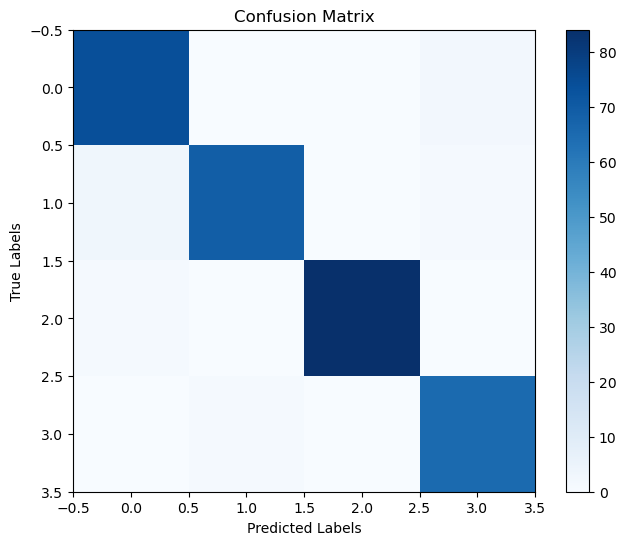

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best accuracy :0.9833333333333333 , optimal epoch : 5
[0.93, 0.9733333333333334, 0.97, 0.9466666666666667, 0.9833333333333333, 0.9666666666666667, 0.97, 0.9766666666666667, 0.98, 0.9733333333333334, 0.97, 0.97, 0.9666666666666667, 0.9766666666666667, 0.97, 0.9733333333333334, 0.98, 0.9766666666666667, 0.97, 0.9733333333333334, 0.9666666666666667, 0.9766666666666667, 0.9633333333333334, 0.95, 0.97]


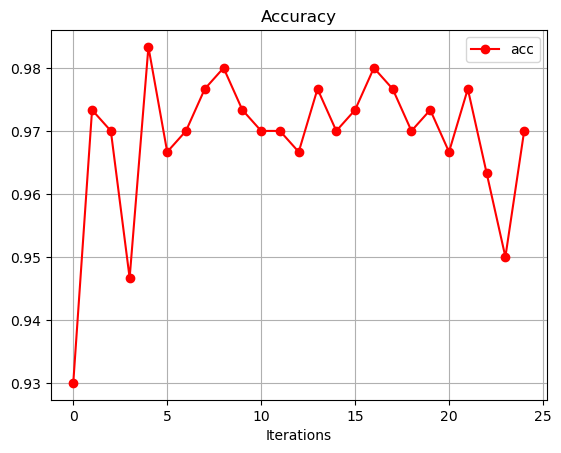

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    SGD_model = SGDClassifier( loss = "log_loss" ,max_iter = i ,random_state = 54)
    SGD_model.fit(x_train , y_train)
    acc = SGD_model.score(x_test , y_test)
    acc_history.append(acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

In [ ]:
'''
parameters = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['log', 'modified_huber'],
    'learning_rate': ['optimal', 'invscaling'],
}
'''

"\nparameters = {\n    'alpha': [0.0001, 0.001, 0.01],\n    'loss': ['log', 'modified_huber'],\n    'learning_rate': ['optimal', 'invscaling'],\n}\n"

In [ ]:
Epoch = 5
acc_histories=[]
# Values of alpha to test
alphas = [0.0001, 0.001, 0.01]
for i in range(3):
    best_acc = 0
    SGD_model = SGDClassifier(loss='log_loss', alpha=alphas[i], max_iter = Epoch, random_state=54)
    SGD_model.fit(x_train, y_train)
    acc = SGD_model.score(x_test, y_test)
    acc_histories.append(acc)
for i in range(3):
    print(f"accuracy for alpha = {alphas[i]} is {acc_histories[i]} ")


accuracy for alpha = 0.0001 is 0.9833333333333333 
accuracy for alpha = 0.001 is 0.9766666666666667 
accuracy for alpha = 0.01 is 0.98 


In [ ]:
Epoch = 5
acc_histories=[]
# Values of alpha to test
loss_lst = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge']
for i in range(len(loss_lst)):
    best_acc = 0
    SGD_model = SGDClassifier(loss=loss_lst[i], alpha=0.0001, max_iter = Epoch, random_state=54)
    SGD_model.fit(x_train, y_train)
    acc = SGD_model.score(x_test, y_test)
    acc_histories.append(acc)
print(f"alpha = 0.0001")
for i in range(len(loss_lst)):
    print(f"loss function : {loss_lst[i]} \n   accuracy = {acc_histories[i]} ")


alpha = 0.0001
loss function : hinge 
   accuracy = 0.9733333333333334 
loss function : log_loss 
   accuracy = 0.9833333333333333 
loss function : modified_huber 
   accuracy = 0.9733333333333334 
loss function : squared_hinge 
   accuracy = 0.9766666666666667 


### 1-3-3 Perceptron model

In [ ]:
perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=2.53, random_state = 54)
perceptron_model.fit(x_train , y_train)
perceptron_model.score(x_test , y_test)

0.9866666666666667

In [ ]:
#perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=1, random_state = 54)
perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=0.417, max_iter = 3, random_state = 54)
perceptron_model.fit(x_train , y_train)
y_hat = perceptron_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = perceptron_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = perceptron_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
#perceptron_model.predict_proba(x_test)

predict : [0 2 3 3 1 1 3 0 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 1 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 0 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 2 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 0 3 2 1 0 1
 3 2 3 0 3 1 0 1 2 1 3 1 0 2 2 1 1 3 1 2 0 3 3 0 2 2 0 2 0 3 2 0 2 0 2 2 3
 0 1 3 3 0 0 2 0 2 3 1 1 2 3 2 1 1 0 3 1 1 3 2 1 2 2 3 2 3 3 0 1 3 0 0 3 3
 1 2 3 2 0 0 1 0 2 2 0 0 0 2 1 1 1 3 2 0 1 3 0 2 2 1 2 2 0 2 2 3 2 2 0 2 0
 0 3 2 1] 
real :    [0 2 3 3 1 1 3 0 0 1 1 3 1 1 2 0 3 2 1 2 0 2 1 3 0 1 0 1 0 3 0 2 0 3 3 1 2
 1 0 2 0 2 0 0 3 0 2 1 3 3 2 0 2 2 2 2 1 1 3 3 0 0 2 3 3 0 3 3 2 3 2 3 2 2
 0 1 2 0 3 1 2 2 3 3 3 0 1 0 2 0 1 1 2 0 2 3 1 0 0 1 2 3 1 0 3 3 1 0 1 3 0
 1 0 3 2 1 1 0 2 1 0 3 1 0 0 3 0 1 1 0 1 3 1 0 1 0 0 2 2 2 1 3 1 1 2 3 2 0
 3 1 3 0 2 0 1 2 1 1 0 2 1 3 2 2 0 0 2 2 0 2 1 2 2 1 2 2 2 3 2 0 3 2 

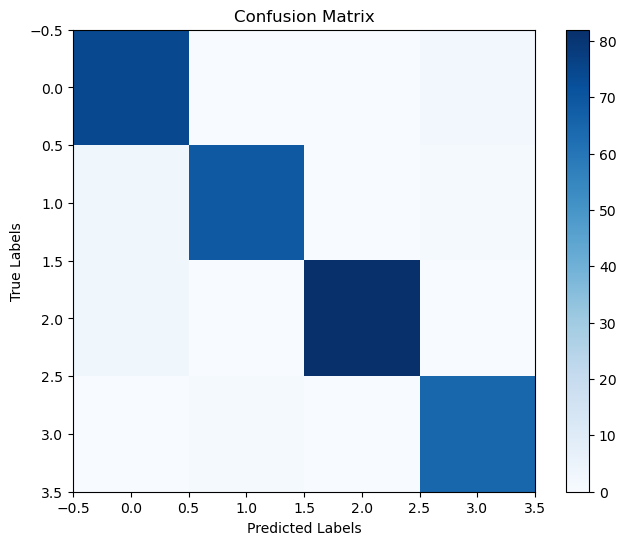

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best accuracy :0.9833333333333333 , optimal epoch : 3
[0.93, 0.95, 0.9833333333333333, 0.97, 0.9533333333333334, 0.96, 0.9633333333333334, 0.9733333333333334, 0.9766666666666667, 0.94, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


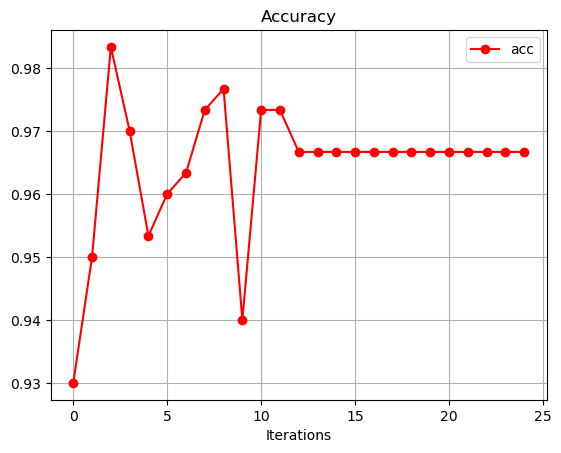

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant",max_iter = i, eta0=1, random_state = 54)
    perceptron_model.fit(x_train , y_train)
    acc = perceptron_model.score(x_test , y_test)
    acc_history.append(acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

This model for eta0 = 0.4171171171171172 have best performance, acc = 0.9866666666666667 


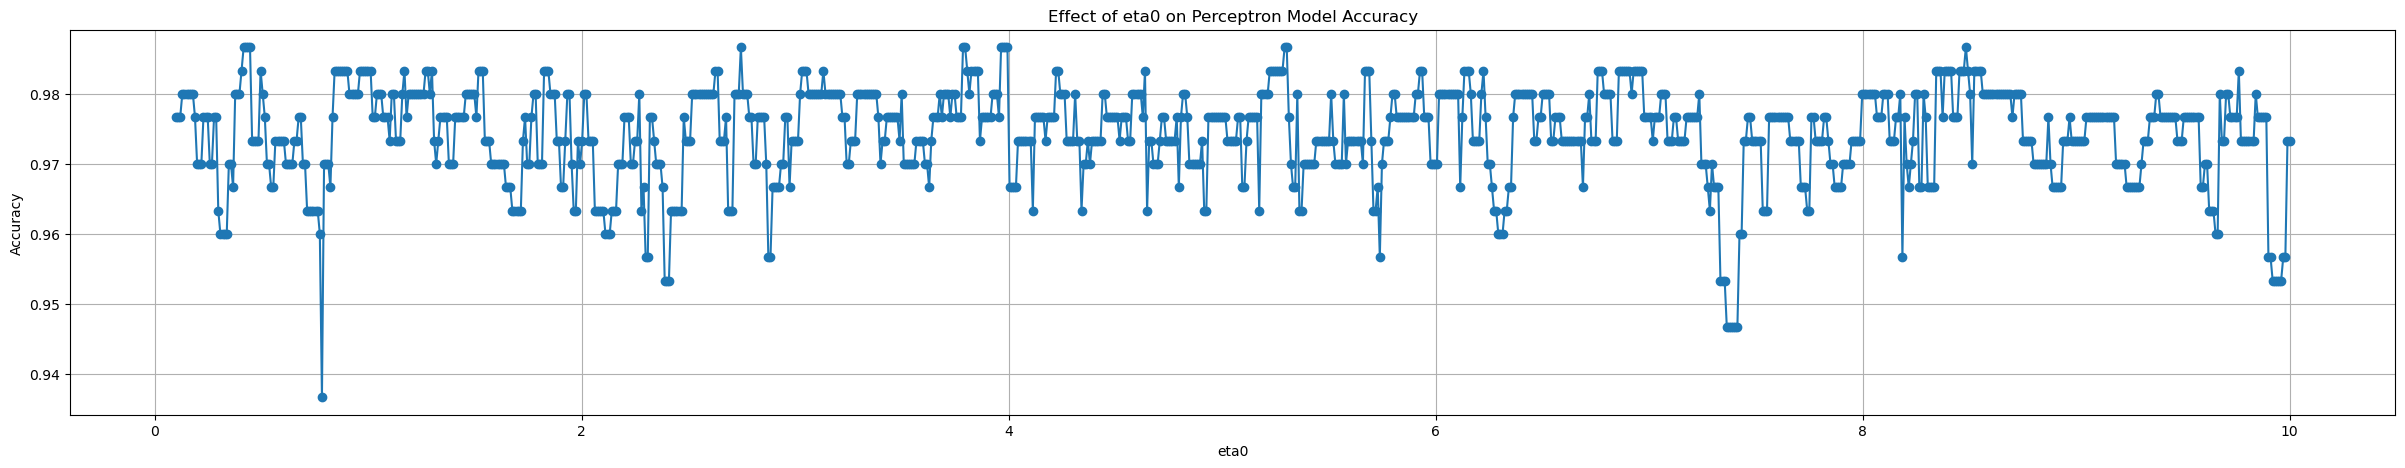

In [ ]:
# Define a range of eta0 (Learning Rate ) values to try
#eta0_values = [0.01, 0.4, 0.75, 1.45, 2, 3, 4, 5]
#eta0_values = range(0.001,3,0.1)
eta0_values = np.linspace(0.1,10,1000)
# Train models with different eta0 values and collect accuracy scores
accuracy_scores = []
best_acc = 0
optimal_eta0 = 0
for eta0 in eta0_values:
    # Train perceptron model
    perceptron_model = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=eta0, max_iter = 3, random_state=54)
    perceptron_model.fit(x_train, y_train)

    # Evaluate accuracy on test set
    accuracy = perceptron_model.score(x_test, y_test)
    accuracy_scores.append(accuracy)
    if accuracy > best_acc:
        best_acc = accuracy
        optimal_eta0 = eta0

print(f"This model for eta0 = {optimal_eta0} have best performance, acc = {best_acc} ")
# Visualize the effect of eta0 on accuracy
plt.figure(figsize=(30, 5))
plt.plot(eta0_values, accuracy_scores, marker='o')
plt.xlabel('eta0')
plt.ylabel('Accuracy')
plt.title('Effect of eta0 on Perceptron Model Accuracy')
#plt.xticks(eta0_values)
plt.grid(True)
plt.show()

In [ ]:
# Regularization
Epoch = 3
eta0 = 0.417
acc_histories=[]
# Values of alpha to test
alphas = [0.0001, 0.001, 0.01]
for i in range(3):
    best_acc = 0
    perceptron_model = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=eta0, max_iter=Epoch, random_state=54)
    perceptron_model.fit(x_train, y_train)
    acc = perceptron_model.score(x_test, y_test)
    acc_histories.append(acc)
for i in range(3):
    print(f"accuracy for alpha = {alphas[i]} is {acc_histories[i]} ")


accuracy for alpha = 0.0001 is 0.9866666666666667 
accuracy for alpha = 0.001 is 0.9866666666666667 
accuracy for alpha = 0.01 is 0.9866666666666667 


## 1-4 Desision boundaries

In [ ]:
def plot_region(x,y,model,name='Train data'):

    def miss_class():

        hat = model.predict(x)
        miss = np.where(y != hat)
        miss = x[miss]
        return miss

    scatter_highlight_kwargs = {'s': 60, 'label': 'Missclassified', 'alpha': 0.7, 'linewidths':2}
    ax = plot_decision_regions(x,
                        y,
                        clf=model,
                        zoom_factor = 1.,
                        legend = 0,
                        X_highlight = miss_class(),
                        scatter_highlight_kwargs =  scatter_highlight_kwargs

    )
    ax.legend(loc='upper left')
    ax.set_title(f'Decision region for {name}')
    ax.set_xlabel('Latent feature 1')
    ax.set_ylabel('Latent feature 2')


In [ ]:
tsne = TSNE(
    n_components = 2,
    verbose = 0,
    random_state = 69
)

In [ ]:
data_reduced = tsne.fit_transform(X,y)

In [ ]:
x_train_r, x_val_r, y_train_r, y_val_r = train_test_split(
    data_reduced,
    y,
    test_size = 0.3, # 80% Train & 20% Test
    shuffle = True,
    random_state = 54
)

# scaling
scaler = StandardScaler().fit(x_train_r)
x_train_r_s  = scaler.transform(x_train_r)
x_val_r_s  = scaler.transform(x_val_r)

In [ ]:
lgr_model = LogisticRegression(solver = "sag" , max_iter = 6 , random_state = 54)
SGD_model = SGDClassifier(loss = "log_loss", alpha=0.0001, max_iter = 5, random_state = 54)
perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=0.417, max_iter = 3, random_state = 54)

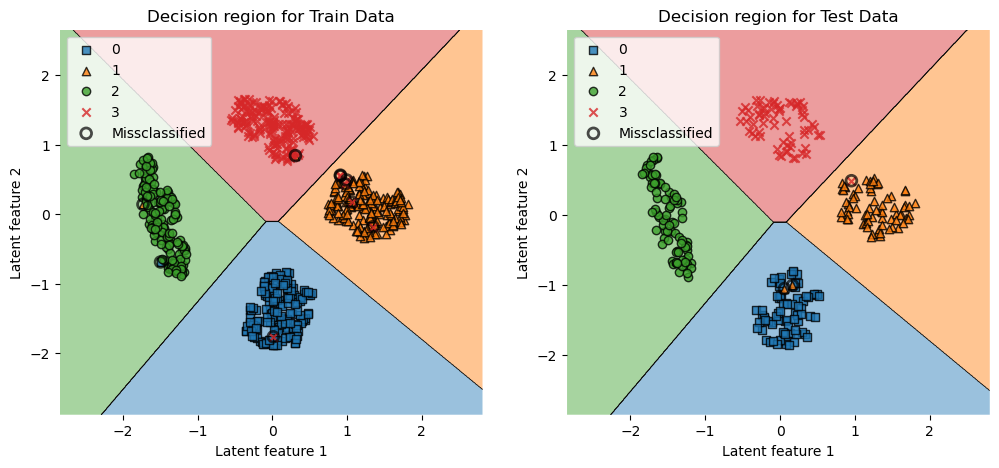

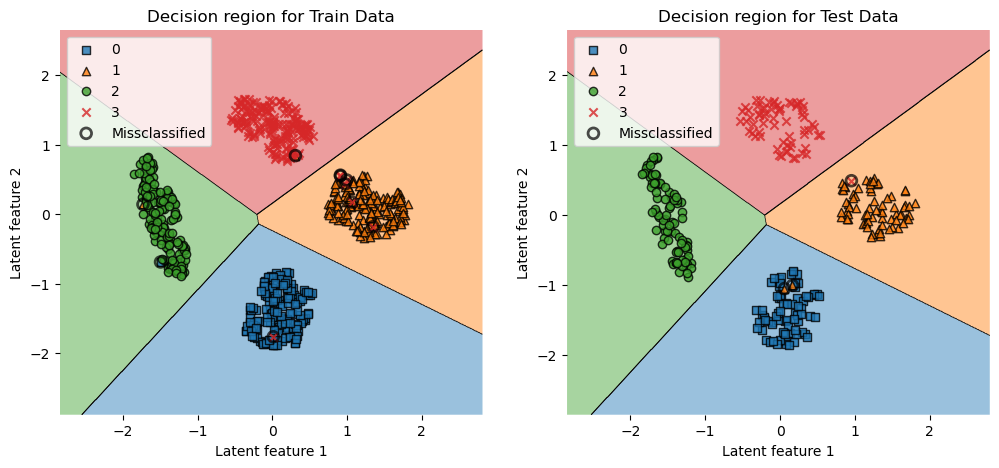

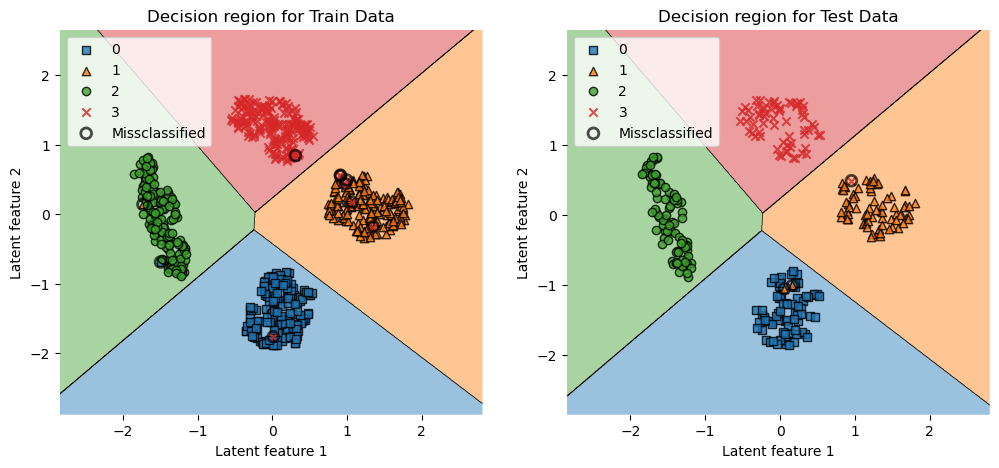

In [ ]:
models = [lgr_model, SGD_model, perceptron_model]

# Train model with new latent data
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_train)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s,
                y_train_r,
                m,
                'Train Data'
    )
    plt.subplot(1,2,2)
    plot_region(x_val_r_s,
                y_val_r,
                m,
                'Test Data'
    )

In [ ]:
# Function to plot decision boundaries for each pair of features
def plot_decision_boundaries(model, X, y):
    for i in range(X.shape[1]):
        for j in range(i+1, X.shape[1]):
            # i*3 + j - 1
            h = .02  # Step size of the meshgrid
            x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
            y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))

            # Predict class labels for each point in meshgrid
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot decision boundaries
            plt.contourf(xx, yy, Z, alpha=0.4)
            plt.scatter(X[:, i], X[:, j], c=y, s=20, edgecolor='k')

            # Highlight misclassified points
            y_pred = model.predict(X)
            misclassified = y_pred != y
            plt.scatter(X[misclassified, i], X[misclassified, j], c='red', marker='x', s=100, label='Misclassified')

            plt.xlabel(f'Feature {i+1}')
            plt.ylabel(f'Feature {j+1}')
            plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

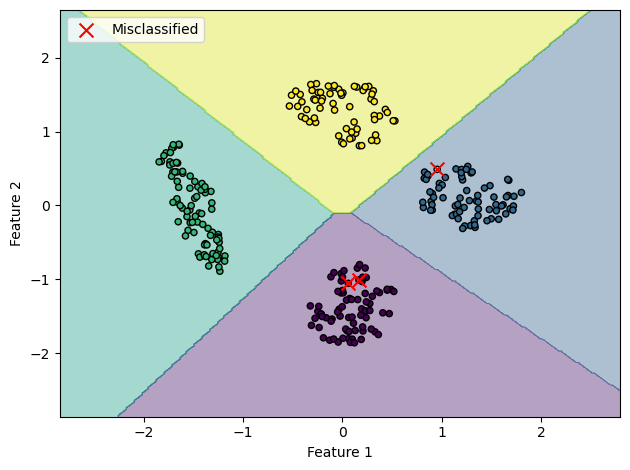

In [ ]:
plt_lgr = plot_decision_boundaries(lgr_model,x_val_r_s, y_val_r)

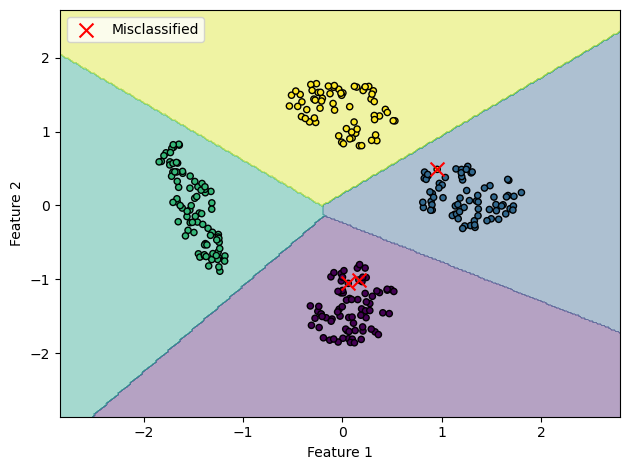

In [ ]:
plt_SGD = plot_decision_boundaries(SGD_model,x_val_r_s, y_val_r)

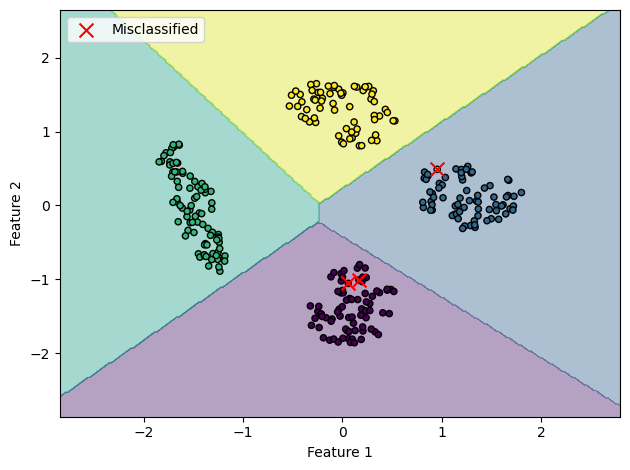

In [ ]:
plt_perceptron = plot_decision_boundaries(perceptron_model,x_val_r_s, y_val_r)

## 1-5 Draw Data

### 1-5-1 Generate dataset

In [ ]:
!pip install drawdata
!pip install pandas polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

^C


In [ ]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
new_data = widget.data
draw_data_pd = widget.data_as_pandas
draw_data_pl = widget.data_as_polars
print(f"Generated dataset shape : {draw_data_pd.shape} ")
print("*****************************************")
draw_data_pd.head()
#draw_data['label']

NameError: name 'widget' is not defined

In [ ]:
print("Generated dataset with non_nomerical labels : ")
draw_data_pd.label.value_counts()

Generated dataset with non_nomerical lables : 


label
b    612
d    611
a    605
c    602
Name: count, dtype: int64

In [ ]:
print("Generated dataset after numerical labeling : ")
draw_data_pd['label'].replace({'a':0 , 'b':1 , 'c':2 , 'd':3}, inplace=True)
draw_data_pd.label.value_counts()

Generated dataset after numerical labeling : 


label
1    612
3    611
0    605
2    602
Name: count, dtype: int64

In [ ]:
np.unique(draw_data_pd.label.values)

array([0, 1, 2, 3])

In [ ]:
X = draw_data_pd[['x','y']].values
y = draw_data_pd[['label']].values
print(X)

[[340.73056155 403.23984003]
 [370.32912673 393.35138783]
 [366.05604233 392.42258541]
 ...
 [322.79158661 125.10692123]
 [309.76502724 150.70404609]
 [327.39305121 126.92718415]]


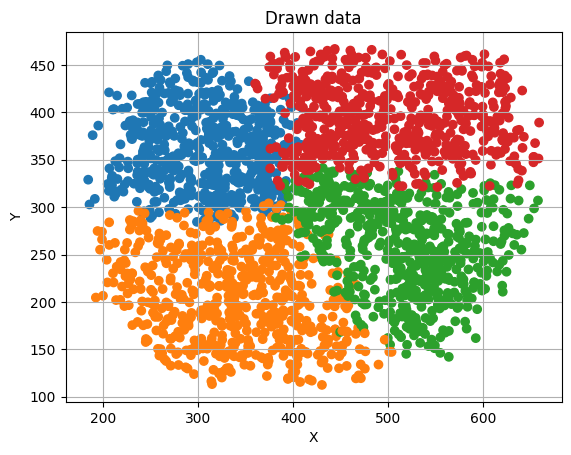

In [ ]:
plt.scatter(X[:,0],X[:,1], c=draw_data_pd['color'])
plt.title('Drawn data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [ ]:
smote = SMOTE(random_state = 54)
x_bal, y_bal = smote.fit_resample(X,y)

# Creating Balanced dataframe
bal_data = {
    'x': x_bal[:,0],
    'y': x_bal[:,1],
    'label': y_bal
}
bal_data = pd.DataFrame(bal_data)

print(f'Number of data in each class before balancing:')
print(draw_data_pd['label'].value_counts())
print('Number of data in each class after balancing:')
print(bal_data.label.value_counts())

print(f"Generated dataset shape : {x_bal.shape} ")
X = x_bal
y = y_bal

NameError: name 'X' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 54)

### 1-5-2 Impleament models for generated dataset

#### 1-5-2-1 Logistic Regression model

In [ ]:
lgr_model = LogisticRegression(solver = "sag" , max_iter = 20 , random_state = 54)
lgr_model.fit(x_train , y_train)
y_hat = lgr_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = lgr_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = lgr_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgr_model.predict_proba(x_test)

predict : [0 3 3 0 0 2 2 2 2 0 2 3 2 3 2 3 2 2 3 0 3 0 0 2 2 0 2 0 3 0 0 3 0 0 2 3 2
 2 3 2 2 2 0 3 3 0 0 0 0 2 1 0 3 3 3 3 2 2 0 2 0 3 3 3 3 1 0 0 3 2 2 3 3 2
 0 3 2 0 0 2 2 3 0 3 2 2 2 2 3 0 3 3 3 0 0 3 2 0 3 0 3 2 2 0 0 2 2 2 3 2 2
 3 3 0 0 2 3 0 3 0 2 2 2 3 2 2 3 2 2 2 0 2 2 2 3 2 2 3 3 0 2 2 0 3 3 0 3 3
 2 3 2 3 2 3 2 3 2 2 2 3 2 0 2 2 3 3 0 2 2 0 0 2 2 2 0 3 2 2 3 3 0 2 2 2 0
 3 3 2 2 0 0 3 0 3 3 0 3 3 0 0 0 3 0 0 2 3 0 3 2 3 0 2 0 0 2 3 3 3 3 3 3 2
 3 3 2 3 3 3 2 3 2 0 3 2 3 2 0 0 3 1 3 2 2 2 0 2 0 3 2 0 2 0 3 3 0 2 2 2 0
 2 3 2 2 0 0 3 0 3 2 3 3 2 2 3 3 3 2 2 3 0 2 3 0 2 3 2 3 3 2 0 2 0 0 0 2 2
 0 3 3 2 2 0 2 3 0 3 3 3 3 2 0 0 2 3 0 3 3 2 3 3 3 2 2 2 3 2 2 0 3 3 2 0 3
 3 3 3 3 2 3 3 2 2 3 0 0 3 0 2 3 2 2 3 3 2 3 2 3 0 2 2 3 2 3 2 2 0 3 2 3 2
 0 0 3 3 3 3 3 0 2 2 2 0 3 2 3 0 0 2 2 3 0 2 2 3 3 3 2 2 2 2 3 2 3 2 3 3 0
 3 0 2 3 3 2 2 2 2 2 0 2 1 2 2 2 3 3 2 0 2 2 0 3 0 2 3 2 0 2 0 3 2 3 3 0 1
 2 0 3 2 2 2 3 0 3 0 0 3 2 2 2 3 3 2 3 0 2 3 2 2 2 0 3 3 2 2 0 0 0 0 2 2 3
 2 3 3 0 3 3 2 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[7.90340602e-01, 1.49588719e-02, 3.04405905e-03, 1.91656467e-01],
       [3.33993150e-01, 9.92901553e-02, 3.42922589e-02, 5.32424435e-01],
       [2.75652210e-01, 1.00069899e-01, 3.25344153e-02, 5.91743475e-01],
       ...,
       [3.35277285e-01, 1.15582327e-01, 4.53179506e-02, 5.03822437e-01],
       [3.24981897e-05, 2.56539633e-01, 6.97291620e-01, 4.61362487e-02],
       [6.88629648e-05, 2.65817781e-01, 6.81394925e-01, 5.27184308e-02]])

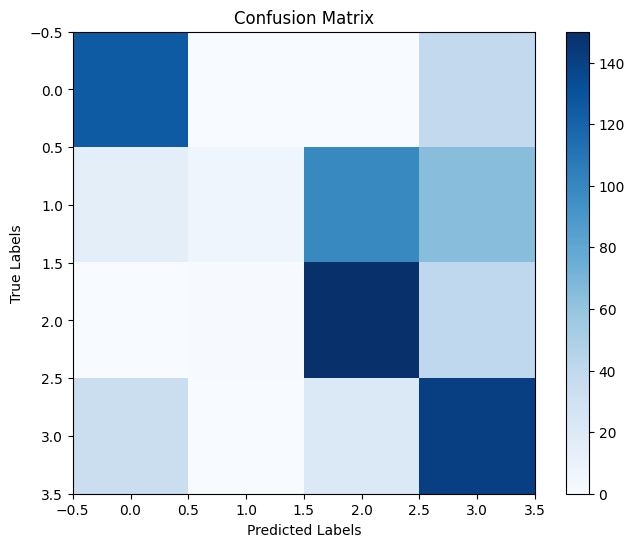

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best accuracy :0.5755102040816327 , optimal epoch : 20
[0.5251700680272109, 0.47891156462585033, 0.5700680272108843, 0.5115646258503401, 0.5700680272108843, 0.563265306122449, 0.5578231292517006, 0.5605442176870749, 0.564625850340136, 0.564625850340136, 0.5673469387755102, 0.5673469387755102, 0.5687074829931973, 0.5687074829931973, 0.5700680272108843, 0.5741496598639456, 0.5714285714285714, 0.5687074829931973, 0.5700680272108843, 0.5755102040816327, 0.5700680272108843, 0.5755102040816327, 0.5700680272108843, 0.5687074829931973, 0.5700680272108843]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


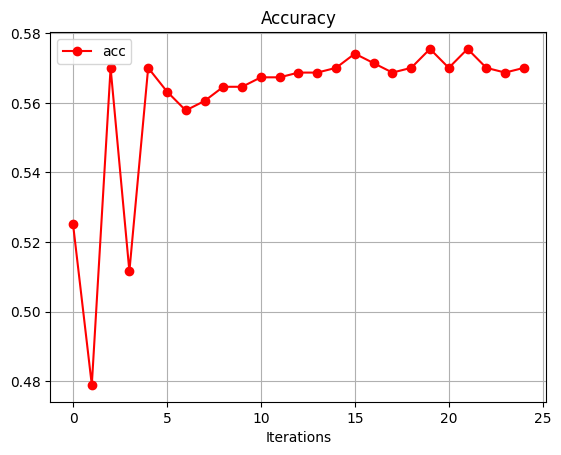

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    lgr_model = LogisticRegression(solver = "sag" , max_iter = i , random_state = 54)
    lgr_model.fit(x_train , y_train)
    acc = lgr_model.score(x_test , y_test)
    acc_history.append( acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

In [ ]:
train_max = np.mean(x_train)
test_max = np.mean(x_test)

# Normalizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
lgr_model = LogisticRegression(solver = "sag" , max_iter = 7 , random_state = 54)
lgr_model.fit(x_train , y_train)
y_hat = lgr_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = lgr_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = lgr_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgr_model.predict_proba(x_test)

predict : [0 0 3 0 0 1 2 2 2 0 1 3 2 1 2 1 1 1 0 0 3 0 0 2 1 0 2 0 3 0 0 3 0 3 1 3 2
 1 1 1 1 1 3 3 3 0 0 0 0 1 1 0 1 3 1 3 1 2 3 1 0 3 1 2 1 1 0 0 3 2 1 3 0 1
 0 2 2 1 0 1 2 3 0 3 2 1 1 2 3 1 1 2 3 0 1 0 1 0 3 3 3 2 1 3 0 2 1 2 1 2 3
 2 1 0 0 2 1 0 3 3 2 2 1 3 2 2 0 2 2 1 1 2 1 2 3 1 1 3 2 0 1 2 1 2 2 3 0 3
 1 2 3 1 1 0 1 3 1 2 2 3 1 0 2 2 3 1 1 2 1 0 0 1 2 2 0 3 2 1 2 3 0 3 1 2 0
 3 2 2 2 3 0 1 0 2 3 0 2 1 0 0 0 0 1 0 2 3 0 3 1 1 0 2 0 0 2 3 1 3 1 2 1 2
 3 1 2 3 3 3 2 2 3 0 3 1 2 2 0 0 1 1 3 1 2 2 0 3 3 3 1 3 2 3 3 3 0 2 2 2 0
 1 0 2 2 0 0 3 3 1 2 2 1 2 2 0 1 3 1 3 3 0 2 2 3 1 3 2 0 1 1 0 2 0 0 0 3 1
 0 1 1 1 1 3 2 1 0 3 3 0 3 2 0 0 1 1 1 1 3 3 2 3 0 2 1 2 1 1 3 0 0 3 2 3 3
 3 3 0 3 2 3 0 2 1 3 0 0 3 0 1 1 1 3 3 0 2 0 1 3 1 1 2 1 2 2 2 2 3 3 2 1 3
 0 0 3 1 0 0 2 3 1 1 2 3 1 2 0 0 0 3 2 1 0 1 2 0 3 2 2 1 1 2 3 2 0 2 1 3 3
 3 0 2 0 2 1 1 1 2 1 0 2 1 2 2 2 3 3 1 0 2 2 1 2 0 2 0 1 3 2 0 3 2 2 3 0 1
 2 3 1 1 1 2 3 0 1 0 3 2 1 2 2 0 3 2 1 0 1 3 1 2 3 0 3 3 1 2 0 0 3 3 1 1 3
 1 3 1 3 1 3 1 

array([[9.19082873e-01, 2.18548380e-05, 4.57526128e-04, 8.04377462e-02],
       [7.59889999e-01, 1.34304088e-03, 2.93627939e-02, 2.09404167e-01],
       [2.19948170e-02, 8.27918985e-07, 3.96039936e-03, 9.74043956e-01],
       ...,
       [8.64320961e-01, 1.21445163e-01, 1.24839453e-02, 1.74993129e-03],
       [7.12498058e-07, 9.27801867e-01, 7.21973578e-02, 6.29433167e-08],
       [8.49765223e-08, 9.98951940e-01, 1.04797494e-03, 1.03593925e-10]])

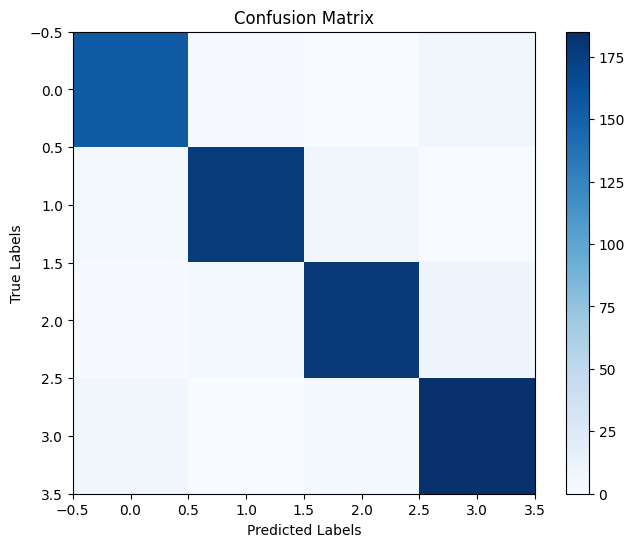

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best accuracy :0.9442176870748299 , optimal epoch : 7
[0.9374149659863945, 0.9346938775510204, 0.9374149659863945, 0.9414965986394558, 0.9428571428571428, 0.9428571428571428, 0.9442176870748299, 0.9428571428571428, 0.9442176870748299, 0.9414965986394558, 0.9387755102040817, 0.9401360544217687, 0.9414965986394558, 0.9401360544217687, 0.9414965986394558, 0.9401360544217687, 0.9414965986394558, 0.9414965986394558, 0.9414965986394558, 0.9428571428571428, 0.9428571428571428, 0.9414965986394558, 0.9414965986394558, 0.9428571428571428, 0.9414965986394558]


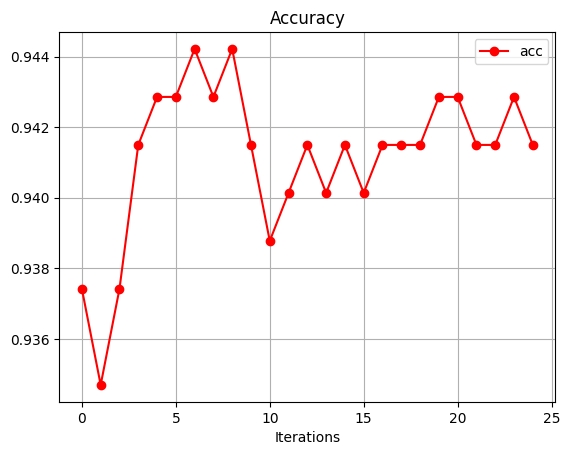

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    lgr_model = LogisticRegression(solver = "sag" , max_iter = i , random_state = 54)
    lgr_model.fit(x_train , y_train)
    acc = lgr_model.score(x_test , y_test)
    acc_history.append( acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

In [ ]:
# Epoch
Epoch = 7

# Solvers to compare
solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
#solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]

# Dictionary to store accuracy history for each solver
acc_histories = {solver: [] for solver in solvers}

# Train models for each solver and record accuracy history
for solver in solvers:
    best_acc = 0
    for i in range(Epoch):
        lgr_model = LogisticRegression(solver=solver, max_iter=i, random_state=54)
        lgr_model.fit(x_train, y_train)
        acc = lgr_model.score(x_test, y_test)
        acc_histories[solver].append(acc)
        if acc > best_acc:
            best_acc = acc

# Plot accuracy history for each solver
plt.figure(figsize=(10, 6))
for solver in solvers:
    plt.plot(range(Epoch), acc_histories[solver], marker='o' ,label=solver)

plt.title('Accuracy over Iterations for Different Solvers')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()



#### 1-5-2-2 SGD model



In [ ]:
SGD_model = SGDClassifier(loss='log_loss', alpha= 0.0001 , max_iter = 6, random_state=54)
SGD_model.fit(x_train , y_train)
y_hat = SGD_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = SGD_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = SGD_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgr_model.predict_proba(x_test)

predict : [0 0 3 0 0 1 2 2 2 0 1 2 2 1 2 1 1 1 0 0 3 0 0 2 2 0 2 0 3 0 0 3 0 3 1 3 2
 1 1 1 1 1 3 3 3 0 0 0 0 2 1 0 1 3 1 3 1 2 3 1 0 3 1 2 1 1 0 0 3 2 1 3 0 1
 0 2 2 1 0 1 2 3 0 3 2 1 1 2 3 1 2 2 3 0 1 0 1 0 3 0 3 2 1 3 0 2 1 2 1 2 3
 2 1 0 0 2 1 0 3 3 2 2 1 3 3 2 0 2 2 1 1 2 1 2 3 1 1 3 2 0 1 2 1 2 2 3 0 0
 2 2 3 1 1 0 1 3 2 2 2 3 1 0 2 2 3 1 1 2 1 0 0 1 2 2 0 3 2 1 2 3 0 3 1 2 0
 3 2 2 2 3 0 1 0 0 3 0 2 1 0 0 1 0 1 0 2 3 0 3 1 1 0 2 0 0 2 3 1 0 1 2 1 2
 3 0 2 3 3 0 2 2 3 0 3 1 2 2 0 0 1 1 3 1 2 2 0 3 3 3 1 0 2 3 3 3 0 2 2 2 0
 1 0 2 2 0 0 3 0 1 2 2 1 2 2 0 1 3 1 3 3 0 2 2 3 2 3 2 0 1 1 0 2 0 0 0 3 1
 0 1 1 1 1 3 2 1 0 3 3 0 3 2 0 0 1 1 1 1 3 3 2 3 0 2 1 2 1 1 3 0 0 3 2 3 3
 3 3 0 3 2 3 0 2 1 3 0 0 3 0 1 1 1 3 3 0 2 0 1 3 1 1 2 1 2 2 2 2 3 3 2 1 3
 0 0 3 1 0 0 2 3 1 1 2 3 1 2 0 0 0 3 2 1 0 1 2 0 3 2 2 1 1 2 3 2 0 2 1 3 3
 3 0 2 0 2 1 2 1 2 1 0 2 1 2 2 2 3 3 1 0 2 2 1 2 0 2 0 1 3 2 0 3 2 2 3 0 1
 2 3 1 1 1 2 3 0 1 0 3 0 1 2 2 0 3 2 1 0 1 3 1 2 3 0 3 3 1 2 0 0 3 3 1 2 3
 1 3 1 3 2 3 1 

array([[9.19082873e-01, 2.18548380e-05, 4.57526128e-04, 8.04377462e-02],
       [7.59889999e-01, 1.34304088e-03, 2.93627939e-02, 2.09404167e-01],
       [2.19948170e-02, 8.27918985e-07, 3.96039936e-03, 9.74043956e-01],
       ...,
       [8.64320961e-01, 1.21445163e-01, 1.24839453e-02, 1.74993129e-03],
       [7.12498058e-07, 9.27801867e-01, 7.21973578e-02, 6.29433167e-08],
       [8.49765223e-08, 9.98951940e-01, 1.04797494e-03, 1.03593925e-10]])

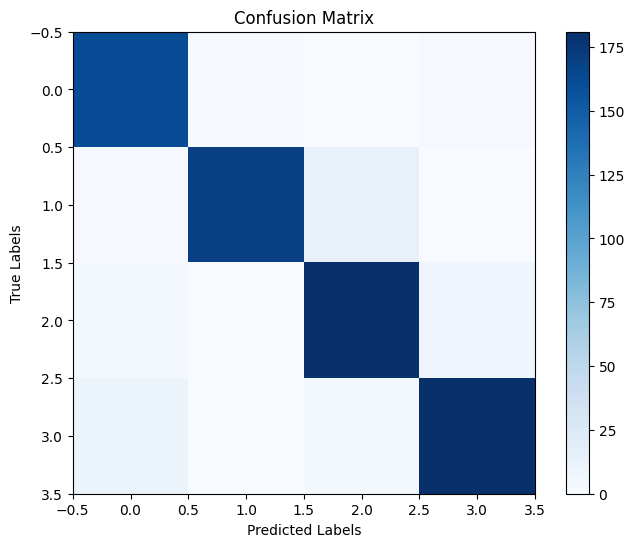

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    SGD_model = SGDClassifier( loss = "log_loss" ,max_iter = i ,random_state = 54)
    SGD_model.fit(x_train , y_train)
    acc = SGD_model.score(x_test , y_test)
    acc_history.append(acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

best accuracy :0.9401360544217687 , optimal epoch : 6
[0.9047619047619048, 0.927891156462585, 0.819047619047619, 0.8693877551020408, 0.8639455782312925, 0.9401360544217687, 0.9387755102040817, 0.908843537414966, 0.9251700680272109, 0.9115646258503401, 0.9374149659863945, 0.8884353741496599, 0.927891156462585, 0.9129251700680272, 0.9170068027210885, 0.8925170068027211, 0.9401360544217687, 0.9360544217687075, 0.9333333333333333, 0.9319727891156463, 0.9333333333333333, 0.926530612244898, 0.9346938775510204, 0.9319727891156463, 0.9224489795918367]


In [ ]:
Epoch = 6
acc_histories=[]
# Values of alpha to test
alphas = [0.0001, 0.001, 0.01]
for i in range(3):
    best_acc = 0
    SGD_model = SGDClassifier(loss='log_loss', alpha=alphas[i], max_iter = Epoch, random_state=54)
    SGD_model.fit(x_train, y_train)
    acc = SGD_model.score(x_test, y_test)
    acc_histories.append(acc)
for i in range(3):
    print(f"accuracy for alpha = {alphas[i]} is {acc_histories[i]} ")


accuracy for alpha = 0.0001 is 0.9401360544217687 
accuracy for alpha = 0.001 is 0.9401360544217687 
accuracy for alpha = 0.01 is 0.927891156462585 


In [ ]:
Epoch = 6
acc_histories=[]
# Values of alpha to test
loss_lst = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge']
for i in range(len(loss_lst)):
    best_acc = 0
    SGD_model = SGDClassifier(loss=loss_lst[i], alpha=0.0001, max_iter = Epoch, random_state=54)
    SGD_model.fit(x_train, y_train)
    acc = SGD_model.score(x_test, y_test)
    acc_histories.append(acc)
print(f"alpha = 0.0001")
for i in range(len(loss_lst)):
    print(f"loss function : {loss_lst[i]} \n   accuracy = {acc_histories[i]} ")

alpha = 0.0001
loss function : hinge 
   accuracy = 0.9319727891156463 
loss function : log_loss 
   accuracy = 0.9401360544217687 
loss function : modified_huber 
   accuracy = 0.9102040816326531 
loss function : squared_hinge 
   accuracy = 0.8421768707482993 


#### 1-5-2-3 perceptron model

In [ ]:
#perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=1, random_state = 54)
perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=4.32, max_iter = 2, random_state = 54)
perceptron_model.fit(x_train , y_train)
y_hat = perceptron_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = perceptron_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = perceptron_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
#perceptron_model.predict_proba(x_test)

predict : [0 0 3 0 0 1 2 2 2 0 1 2 2 1 2 1 1 1 0 0 3 0 0 2 2 0 2 0 3 0 0 3 0 3 1 3 2
 1 1 1 1 1 3 3 3 0 0 0 0 1 1 0 1 3 1 3 1 2 3 1 0 3 1 2 1 1 0 0 3 2 1 3 0 1
 0 2 2 1 0 1 2 3 0 3 2 1 1 2 3 1 2 2 3 0 1 0 1 0 3 0 3 2 1 3 0 2 1 2 1 2 3
 2 1 0 0 2 1 0 3 3 2 2 1 3 3 2 0 2 2 1 1 2 1 2 3 1 1 3 2 0 1 2 1 2 2 3 0 0
 1 2 3 1 1 0 1 3 2 2 2 3 1 0 2 2 3 1 1 2 1 0 0 1 2 2 0 3 2 1 2 3 0 3 1 2 0
 3 2 2 2 3 0 1 0 2 3 0 2 1 0 0 1 0 1 0 2 3 0 3 1 1 0 2 0 0 2 3 1 3 1 2 1 2
 3 0 2 3 3 0 2 2 3 0 3 1 2 2 0 0 1 1 3 1 2 2 0 3 3 3 1 0 2 3 3 3 0 2 2 2 0
 1 0 2 2 0 0 3 0 1 2 2 1 3 2 0 1 3 1 3 3 0 2 2 3 1 3 2 0 1 1 0 2 0 0 0 3 1
 0 1 1 1 1 3 2 1 0 3 3 0 3 2 0 0 1 1 1 1 3 3 2 3 0 2 1 2 1 1 3 0 0 3 2 3 3
 3 3 0 3 2 3 0 2 1 3 0 0 3 0 1 1 1 3 3 0 2 0 1 3 1 1 2 1 2 2 2 2 3 3 2 1 3
 0 0 3 1 0 0 2 3 1 1 2 3 1 2 0 0 0 3 2 1 0 1 2 0 3 2 2 1 1 2 3 2 0 2 1 3 3
 3 0 2 0 2 1 1 1 2 1 0 2 1 2 2 2 3 3 1 0 2 2 1 2 0 2 0 1 3 2 0 3 2 2 3 0 1
 3 3 1 1 1 2 3 0 1 0 3 2 1 2 2 0 3 2 1 0 1 3 1 2 3 0 3 3 1 2 0 0 3 3 1 2 3
 1 3 1 3 1 3 1 

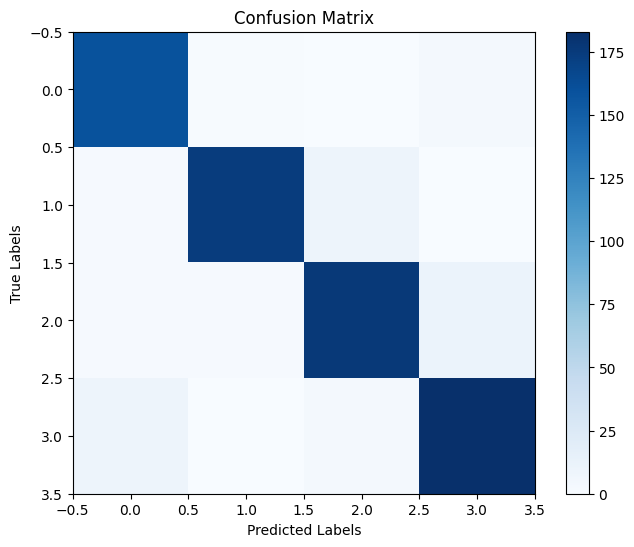

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant",max_iter = i, eta0=4.32, random_state = 54)
    perceptron_model.fit(x_train , y_train)
    acc = perceptron_model.score(x_test , y_test)
    acc_history.append(acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

best accuracy :0.9414965986394558 , optimal epoch : 2
[0.9020408163265307, 0.9414965986394558, 0.8054421768707483, 0.8054421768707483, 0.8285714285714286, 0.8653061224489796, 0.8258503401360544, 0.8, 0.8367346938775511, 0.7727891156462585, 0.7687074829931972, 0.780952380952381, 0.8231292517006803, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381, 0.780952380952381]


In [ ]:
# Define a range of eta0 (Learning Rate ) values to try
#eta0_values = [0.01, 0.4, 0.75, 1.45, 2, 3, 4, 5]
#eta0_values = range(0.001,3,0.1)
eta0_values = np.linspace(0.1,10,1000)
# Train models with different eta0 values and collect accuracy scores
accuracy_scores = []
best_acc = 0
optimal_eta0 = 0
for eta0 in eta0_values:
    # Train perceptron model
    perceptron_model = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=eta0, max_iter = 2, random_state=54)
    perceptron_model.fit(x_train, y_train)

    # Evaluate accuracy on test set
    accuracy = perceptron_model.score(x_test, y_test)
    accuracy_scores.append(accuracy)
    if accuracy > best_acc:
        best_acc = accuracy
        optimal_eta0 = eta0

print(f"This model for eta0 = {optimal_eta0} have best performance, acc = {best_acc} ")
# Visualize the effect of eta0 on accuracy
plt.figure(figsize=(30, 5))
plt.plot(eta0_values, accuracy_scores, marker='o')
plt.xlabel('eta0')
plt.ylabel('Accuracy')
plt.title('Effect of eta0 on Perceptron Model Accuracy')
#plt.xticks(eta0_values)
plt.grid(True)
plt.show()

This model for eta0 = 4.321621621621622 have best performance, acc = 0.9428571428571428 


In [ ]:
# Regularization
Epoch = 2
eta0 = 4.32
acc_histories=[]
# Values of alpha to test
alphas = [0.0001, 0.001, 0.01]
for i in range(3):
    best_acc = 0
    perceptron_model = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=eta0, max_iter=Epoch, random_state=54)
    perceptron_model.fit(x_train, y_train)
    acc = perceptron_model.score(x_test, y_test)
    acc_histories.append(acc)
for i in range(3):
    print(f"accuracy for alpha = {alphas[i]} is {acc_histories[i]} ")

accuracy for alpha = 0.0001 is 0.9414965986394558 
accuracy for alpha = 0.001 is 0.9414965986394558 
accuracy for alpha = 0.01 is 0.9414965986394558 


### 1-5-3 Visualize Decision Boundries for Impleamented models

In [ ]:
data_reduced = tsne.fit_transform(X,y)

In [ ]:
x_train_r, x_val_r, y_train_r, y_val_r = train_test_split(
    data_reduced,
    y,
    test_size = 0.3,
    random_state = 54
)

# scaling
scaler = StandardScaler().fit(x_train_r)
x_train_r_s  = scaler.transform(x_train_r)
x_val_r_s  = scaler.transform(x_val_r)

In [ ]:
lgr_model = LogisticRegression(solver = "sag" , max_iter = 7 , random_state = 54)
SGD_model = SGDClassifier(loss='log_loss', alpha= 0.0001 , max_iter = 6, random_state=54)
perceptron_model = SGDClassifier(loss = "perceptron", learning_rate="constant", eta0=4.32, max_iter = 2, random_state = 54)

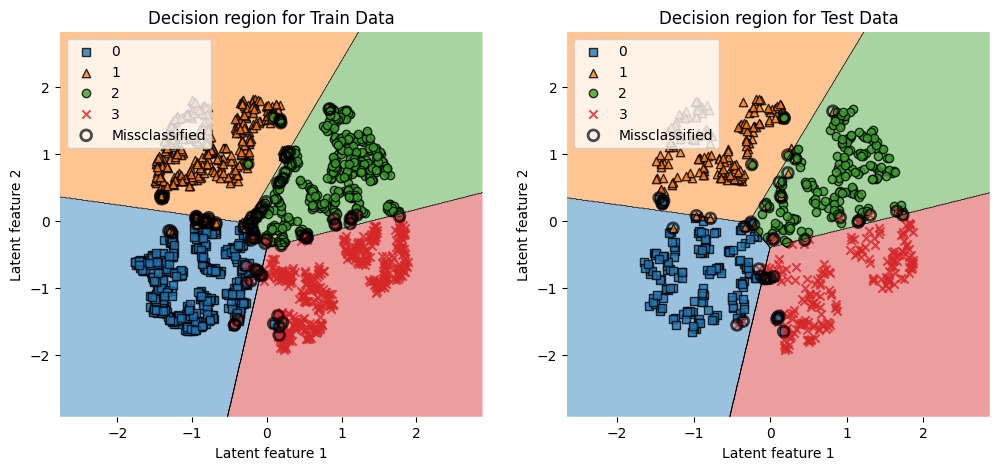

In [ ]:
models = [lgr_model, SGD_model, perceptron_model]

# Train model with new latent data
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_train)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s,
                y_train_r,
                m,
                'Train Data'
    )
    plt.subplot(1,2,2)
    plot_region(x_val_r_s,
                y_val_r,
                m,
                'Test Data'
    )

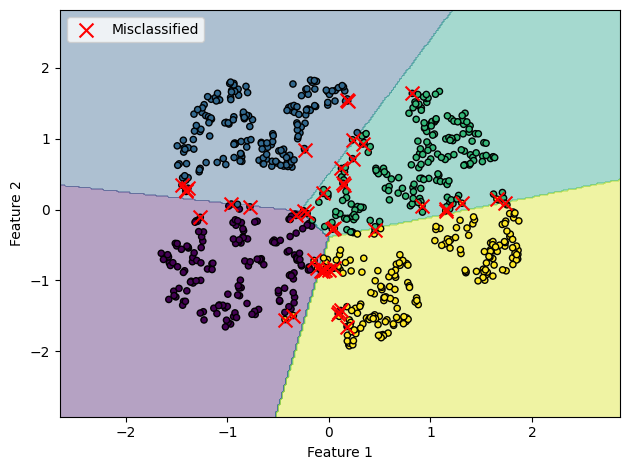

In [ ]:
plt_lgr = plot_decision_boundaries(lgr_model,x_val_r_s, y_val_r)

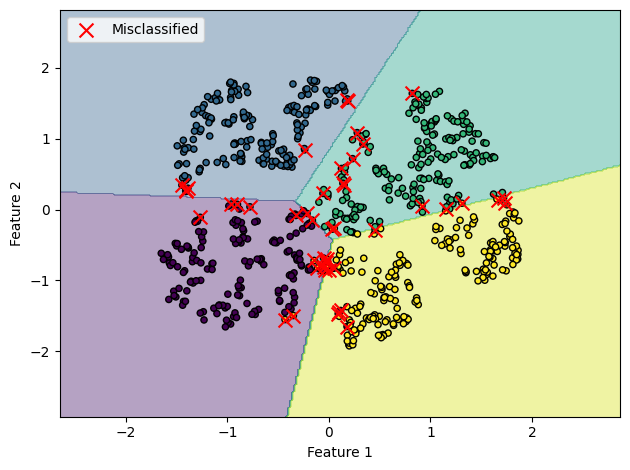

In [ ]:
plt_SGD = plot_decision_boundaries(SGD_model,x_val_r_s, y_val_r)

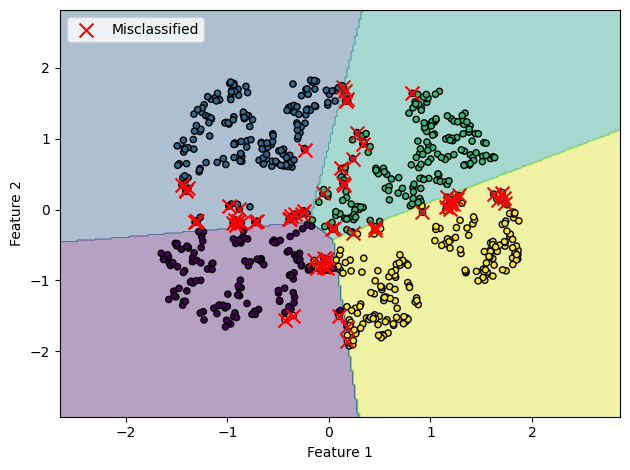

In [ ]:
plt_perceptron = plot_decision_boundaries(perceptron_model,x_val_r_s, y_val_r)